<a href="https://colab.research.google.com/github/WafaAlyammahi/Activity3-FDS/blob/main/Activity3_WafaAlyammahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [6]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [7]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [8]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-8-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [9]:
#merged_data.dtypes

In [10]:
pollution_data = merged_data[['pm10','neighborhood']]

In [11]:
pollution_data.shape[0]

118495

In [12]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [13]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [14]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [15]:
pollution_data['pm10'].min()

0.0

In [16]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [17]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [18]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [19]:
joined_table = joined_table.where('pm10', are.below(300))

In [20]:
len(joined_table)

2

In [21]:
joined_table.num_rows

117356

Sample Mean PM10: 16.4738397955


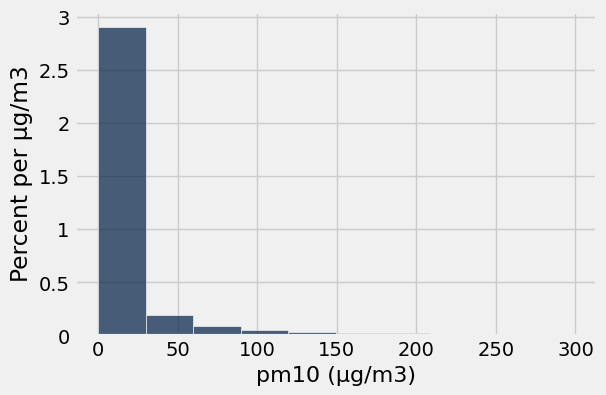

In [23]:
# Randomly sample 10% of the rows from the joined_table without replacement
sample_table = joined_table.sample(int(joined_table.num_rows * 0.1), with_replacement=False)

# Compute the mean pm10 value for this sample
mean_sample_pm10 = np.mean(sample_table.column('pm10'))
print("Sample Mean PM10:", mean_sample_pm10)

# Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
sample_table.hist('pm10', bins=10, unit='μg/m3', normed=True, overlay=True)


# Comment on the shape of the histogram and compare it to the distribution of the full dataset.

- Sample Mean PM10: 16.47 μg/m³
- The empirical histogram of the sample shows a right-skewed distribution.
- Most of the PM10 values are concentrated at the lower end (below 50 μg/m³).
- The frequency gradually decreases when PM10 increases.
- Values above 150 μg/m³ are very rare.
- This is consistent with the shape of the overall data set. it indicates that the sample is representative of the entire population.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [25]:
# Use the bootstrap method to estimate the median pm10 value for the entire dataset

def bootstrap_medians_table(table, column_name, num_samples):
    medians = []
    for i in range(num_samples):
        # Use Table.sample with replacement to create a bootstrap sample
        sample = table.sample(with_replacement=True)
        # Compute the median of the 'pm10' column using np.median
        sample_median = np.median(sample.column(column_name))
        medians.append(sample_median)
    return Table().with_column('Bootstrap Medians', medians)

In [26]:
# Generate 5,000 bootstrap samples and compute the median for each sample

bootstrap_table = bootstrap_medians_table(joined_table, 'pm10', 5000)

In [27]:
# Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.

lower_bound = np.percentile(bootstrap_table.column('Bootstrap Medians'), 2.5)
upper_bound = np.percentile(bootstrap_table.column('Bootstrap Medians'), 97.5)

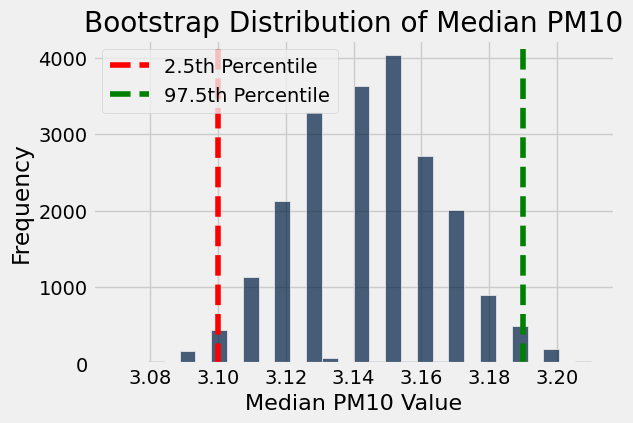

In [28]:
# Visualize the results by drawing an empirical histogram of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
bootstrap_table.hist(bins=30)
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(upper_bound, color='green', linestyle='--', label='97.5th Percentile')
plt.title('Bootstrap Distribution of Median PM10')
plt.xlabel('Median PM10 Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [29]:
# Report the confidence interval and interpret what it means in the context of air quality.
print("95% Confidence Interval for the Median PM10:", round(lower_bound, 2), "to", round(upper_bound, 2))

95% Confidence Interval for the Median PM10: 3.1 to 3.19


Based on the bootstrap analysis, the 95% confidence interval for the median PM10 concentration in the dataset is approximately 3.10 to 3.19. This means that if we were to take many random samples from the population and compute the median PM10 value for each one, about 95% of those medians would fall within this range. In the context of air quality, this narrow interval suggests that the typical (median) level of PM10 pollution is relatively low and consistent across the sampled data. It provides a strong indication that most areas covered by the dataset tend to experience low to moderate levels of particulate matter, which is generally a positive sign for public health and environmental conditions.


## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

95% Confidence Interval for Mean PM10: [15.962599939500324, 16.385202712260131]
Reject H0: Significant difference from 20 μg/m³.


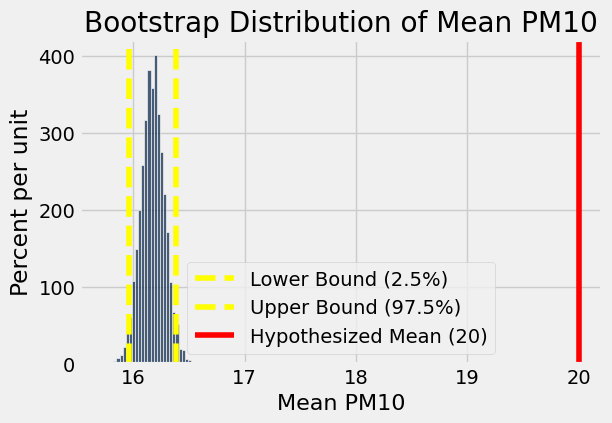

In [33]:
# Hypothesis Testing Using Confidence Intervals

# Define a function to generate bootstrap sample means
def bootstrap_mean(table, label, iterations):
    means = []
    for i in range(iterations):
        resample = table.sample(with_replacement=True)
        means.append(np.mean(resample.column(label)))
    return means

# Generate 5,000 bootstrap sample means for the pm10 column
boot_means = bootstrap_mean(joined_table, 'pm10', 5000)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
mean_interval = [np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)]
print("95% Confidence Interval for Mean PM10:", mean_interval)

# Hypothesis test based on whether 20 μg/m³ lies within the interval
if 20 >= mean_interval[0] and 20 <= mean_interval[1]:
    print("Fail to reject H0: No significant difference from 20 μg/m³.")
else:
    print("Reject H0: Significant difference from 20 μg/m³.")

# Visualize the bootstrap distribution with confidence interval and hypothesized mean
Table().with_column('Bootstrapped Means', boot_means).hist(bins=30)
plt.axvline(mean_interval[0], color='yellow', linestyle='--', label='Lower Bound (2.5%)')
plt.axvline(mean_interval[1], color='yellow', linestyle='--', label='Upper Bound (97.5%)')
plt.axvline(20, color='red', linestyle='-', label='Hypothesized Mean (20)')
plt.title("Bootstrap Distribution of Mean PM10")
plt.xlabel("Mean PM10")
plt.legend()
plt.show()


The 95% confidence interval for the average PM10 level in the population is approximately [15.96, 16.39] μg/m³. Since the hypothesized value of 20 μg/m³ does not fall within this interval, we reject the null hypothesis.

This means there is statistically significant evidence that the true average PM10 level is not 20 μg/m³. In fact, the observed values suggest that the air quality, in terms of PM10 concentration, is better than expected — with lower pollution levels than the assumed baseline.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


Top 3 Neighborhoods with Highest Mean PM10:
neighborhood | pm10 mean
Crotona Park | 53.4512
Pelham Bay   | 34.6071
Tremont      | 29.829

95% CI for Crotona Park: [43.317299504950498, 64.003623762376222]


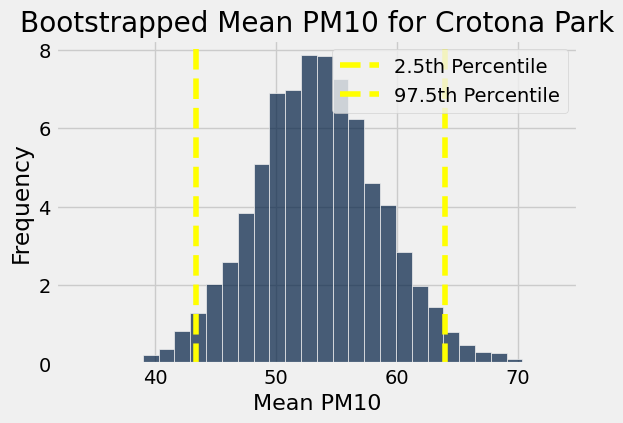


95% CI for Pelham Bay: [22.543830357142856, 48.373482142857149]


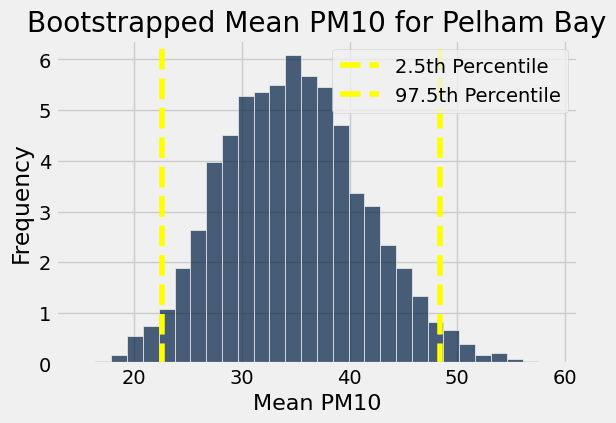


95% CI for Tremont: [23.468228316326528, 36.434798469387744]


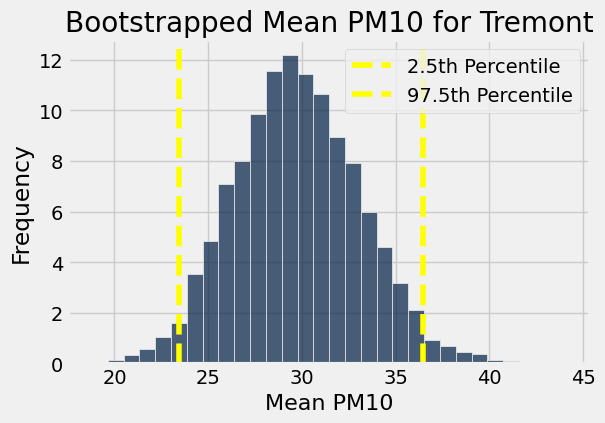

In [34]:
# Percentiles and Extreme Values
# Group by neighborhood and calculate the mean PM10 for each
neighborhood_means = joined_table.group('neighborhood', np.mean)

# Sort to find the top 3 neighborhoods with the highest mean PM10 levels
top3_neighborhoods = neighborhood_means.sort('pm10 mean', descending=True).take(np.arange(3))
print("Top 3 Neighborhoods with Highest Mean PM10:")
print(top3_neighborhoods)

# Define a function to perform bootstrap sampling for a specific neighborhood
def bootstrap_neighborhood_mean(neighborhood_name, iterations=5000):
    means = []
    subset = joined_table.where('neighborhood', are.equal_to(neighborhood_name))
    for _ in range(iterations):
        resample = subset.sample(with_replacement=True)
        means.append(np.mean(resample.column('pm10')))
    return means

# For each of the top 3 neighborhoods, generate bootstrap means and plot
for i in np.arange(3):
    neighborhood = top3_neighborhoods.column('neighborhood').item(i)
    boot_means = bootstrap_neighborhood_mean(neighborhood)

    # Calculate 95% confidence interval
    ci = [np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)]
    print(f"\n95% CI for {neighborhood}: {ci}")

    # Plot histogram
    Table().with_column('Bootstrapped Means', boot_means).hist(bins=30)
    plt.axvline(ci[0], color='yellow', linestyle='--', label='2.5th Percentile')
    plt.axvline(ci[1], color='yellow', linestyle='--', label='97.5th Percentile')
    plt.title(f"Bootstrapped Mean PM10 for {neighborhood}")
    plt.xlabel("Mean PM10")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.